(demo_cartopy_extent)=
# Setting up the cartopy plot

We will be using cartopy to plot our landsat scenes using the UTM projection.  One important part of that
is being able to set the scene extent, so we can zoom in and out of the image.

This short demo showing how to use [ax.set_extent](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent)
in the PlateCaree projection
so that changes in the central_longitude are correctly plotted on the map.

Below I make 4 plots, each with a different central_longitude, and put
Vancouver on the map for each projection, using Vancouver as a reference point.  The important thing to note
is that the extent limits are given in the projection crs.  So that with a central longitude  of 60 deg E,
for example (plot 2), -180 deg E in the projection crs is -120 deg E in the geodetic crs.

In [1]:
import cartopy.crs as ccrs
import numpy as np
from matplotlib import pyplot as plt


def plate_carree_plot(fig):

    geodetic = ccrs.Geodetic()

    nplots = 4
    #
    # here are some different central longitudes
    #
    central_lon = np.linspace(0.0, 180.0, nplots)
    #
    #  make a new map for each central longitude
    #

    for i, the_lon in enumerate(central_lon):
        #
        # generate a new projection for each plot
        #
        projection = ccrs.PlateCarree(central_longitude=the_lon)
        ax = fig.add_subplot(nplots, 1, i + 1, projection=projection)
        ax.coastlines(resolution="110m")
        #
        # here is vancouver
        #
        x, y = projection.transform_point(-129.1, 49.3, geodetic)
        #
        # pass projection to the plot command to add Vancouver
        # as a blue dot
        #
        ax.plot(x, y, "bo", markersize=15, transform=projection)
        ax.gridlines()
        ax.set_title(f"central longitude = {the_lon} deg")
        #
        # set the extent for the projection
        #
        ax.set_extent([-180, 180, -90, 90], crs=projection)

/home/phil/mini38/envs/work/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


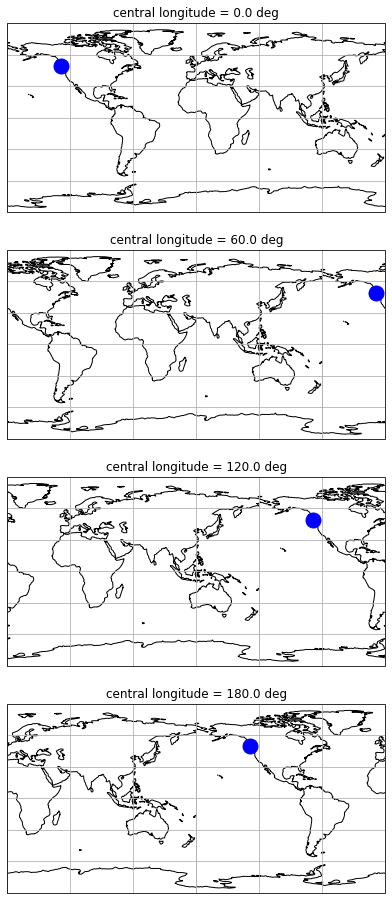

In [2]:
fig = plt.figure(figsize=(10, 16))
plate_carree_plot(fig)